<a href="https://colab.research.google.com/github/michanaj/cs5902-1-2561/blob/master/R_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

See [here](https://colab.research.google.com/drive/1_MmJuotDr9izNwivjgfD1J_bd4OvTFLq) for installing R + brms.

## Setup code
Run the following commands once (~2-3 mins).  It will replace your python2 jupyter kernel by R kernel.

Then, go to menu **Runtime -> Manage Sessions -> TERMINATE**.  

Finally, **RECONNECT**, skip **Setup** and  run **R Code** section.

In [0]:
!apt-get install libssl-dev > /dev/null
!wget https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x ./Miniconda3-latest-Linux-x86_64.sh
!./Miniconda3-latest-Linux-x86_64.sh -b -p /conda  > /dev/null 2>&1 
!/conda/bin/conda install -c r r-rstan r-irkernel gxx_linux-64 -y -q > /dev/null 2>&1
!/conda/bin/R -e "IRkernel::installspec(name = 'python2', displayname = 'R', user = FALSE)"  > /dev/null 2>&1
!mkdir /root/.R/
!echo "CXX14FLAGS=-O3 -mtune=native -march=native -Wno-ignored-attributes -Wno-deprecated-declarations" > /root/.R/Makevars
import os
os._exit(00)


--2019-03-04 05:25:05--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69826864 (67M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  66.59M   117MB/s    in 0.6s    

2019-03-04 05:25:11 (117 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [69826864/69826864]



## R code


In [0]:
Sys.setenv(PATH= paste("/conda/bin" , Sys.getenv("PATH"), sep = ":" ) )
install.packages('codetools', repos='http://cran.rstudio.com/')
options(repr.plot.width  = 3,
        repr.plot.height = 3)
Sys.setenv(USE_CXX14 = 1)
library("rstan") # observe startup messages
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.17.3, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


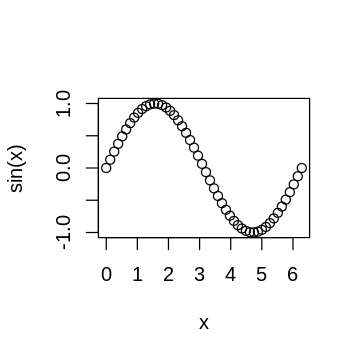

In [0]:
x <- seq(0, 2*pi, length.out=50)
plot(x, sin(x))

In [0]:
stanmodelcode <- "
data {
    int<lower=0> N; 
    real y[N];
}

parameters {
    real mu; 

}

model {
    target += normal_lpdf(mu | 0, 10);
    target += normal_lpdf(y | mu, 1);
}"

y <- rnorm(20)
dat <- list(N = 20, y = y);

fit <- stan(model_code = stanmodelcode, model_name = "example",
            data = dat, iter = 2012, chains = 8, sample_file = 'norm.csv',
            verbose = FALSE,
            refresh = -1)

print(fit)

Inference for Stan model: example.
8 chains, each with iter=2012; warmup=1006; thin=1; 
post-warmup draws per chain=1006, total post-warmup draws=8048.

       mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
mu    -0.14    0.00 0.22  -0.56  -0.29  -0.14   0.01   0.30  2961    1
lp__ -32.56    0.01 0.72 -34.54 -32.73 -32.29 -32.11 -32.06  3424    1

Samples were drawn using NUTS(diag_e) at Mon Mar  4 05:29:30 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


ci_level: 0.8 (80% intervals)
outer_level: 0.95 (95% intervals)


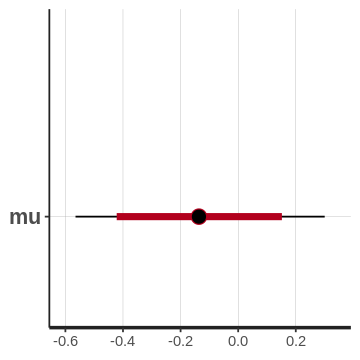

In [0]:
plot(fit)

In [0]:
y <- as.matrix(read.table('https://raw.github.com/wiki/stan-dev/rstan/rats.txt', header = TRUE))
x <- c(8, 15, 22, 29, 36)
xbar <- mean(x)
N <- nrow(y)
T <- ncol(y)
rats_fit <- stan(file = 'https://raw.githubusercontent.com/stan-dev/example-models/master/bugs_examples/vol1/rats/rats.stan')


Warning message in normalizePath(file):
“path[1]="https://raw.githubusercontent.com/stan-dev/example-models/master/bugs_examples/vol1/rats/rats.stan": No such file or directory”

In [0]:
rats_fit

'pars' not specified. Showing first 10 parameters by default.
ci_level: 0.8 (80% intervals)
outer_level: 0.95 (95% intervals)


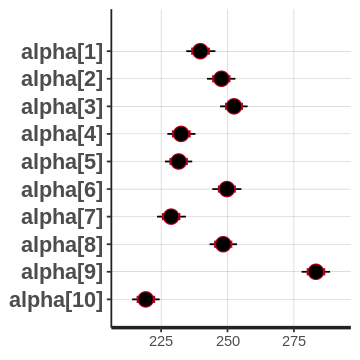

In [0]:
plot(rats_fit)

In [0]:
install.packages('recommenderlab', repos='http://cran.rstudio.com/')


In [0]:
library("recommenderlab") 